# Examples

The following examples show how to use the loader APIs:

## 1. Parsing

This sample shows how to read a CWL document from a remote public URL:

In [1]:
import cwl_loader

cwl_document = cwl_loader.load_cwl_from_location('https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/main/cwl-workflow/pattern-1.cwl')

2025-08-15 01:13:56.419 | INFO     | cwl_loader:load_cwl_from_location:192 - Loading CWL document from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/main/cwl-workflow/pattern-1.cwl...
2025-08-15 01:13:56.677 | INFO     | cwl_loader:load_cwl_from_yaml:123 - Updating the model to v1.2...
2025-08-15 01:13:56.682 | INFO     | cwl_loader:load_cwl_from_yaml:134 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-08-15 01:13:58.237 | INFO     | cwl_loader:load_cwl_from_yaml:142 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-08-15 01:13:58.237 | INFO     | cwl_loader:_clean_process:65 -   Cleaning Workflow pattern-1...
2025-08-15 01:13:58.238 | INFO     | cwl_loader:_clean_process:65 -   Cleaning CommandLineTool clt...
2025-08-15 01:13:58.239 | INFO     | cwl_loader:load_cwl_from_yaml:150 - CWL document successfully dereferenced!


## 1.1 Check the parsed document

In [2]:
import sys

cwl_loader.dump_cwl(cwl_document, sys.stderr)

cwlVersion: v1.2
$graph:
- id: pattern-1
  class: Workflow
  label: Water bodies detection based on NDWI and the otsu threshold
  doc: Water bodies detection based on NDWI and otsu threshold applied to a 
    single Landsat-8/9 acquisition
  inputs:
  - id: aoi
    label: area of interest
    doc: area of interest as a bounding box
    default: -118.985,38.432,-118.183,38.938
    type: string
  - id: epsg
    label: EPSG code
    doc: EPSG code
    default: EPSG:4326
    type: string
  - id: bands
    label: bands used for the NDWI
    doc: bands used for the NDWI
    default:
    - green
    - nir08
    type:
      name: _:cd590dbf-c723-4601-a5c3-808787576a5b
      items: string
      type: array
  - id: item
    label: Landsat-8/9 acquisition reference
    doc: Landsat-8/9 acquisition reference
    type: Directory
  outputs:
  - id: water_bodies
    label: Water bodies detected
    doc: Water bodies detected based on the NDWI and otsu threshold
    outputSource:
    - step/stac-catal

## 2. Components diagram

This sample shows how to write a CWL document to a stream (string, file, ...):

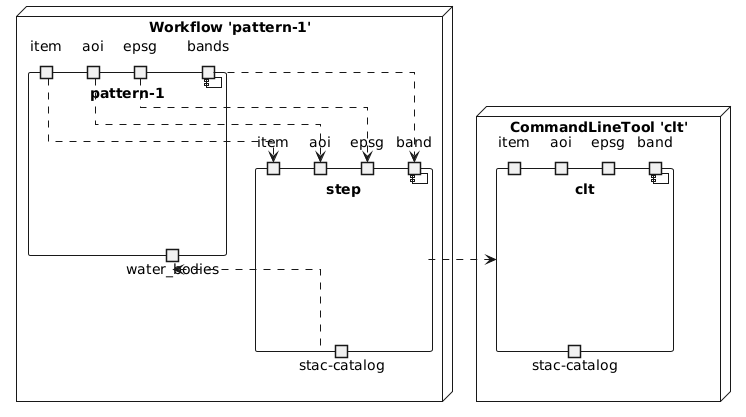

In [3]:
from cwl2puml import (
    to_puml,
    DiagramType
)
from io import (
    StringIO,
    BytesIO
)
from IPython.display import display
from plantuml import deflate_and_encode
from PIL import Image
from urllib.request import urlopen

out = StringIO()
to_puml(
    cwl_document=cwl_document,
    diagram_type=DiagramType.COMPONENTS,
    output_stream=out
)

clear_output = out.getvalue()
encoded = deflate_and_encode(clear_output)
diagram_url = f"https://www.plantuml.com/plantuml/png/{encoded}"

with urlopen(diagram_url) as url:
    img = Image.open(BytesIO(url.read()))
display(img)

## 2.1 Check the generated PlantUML code

In [4]:
print(clear_output)

@startuml
skinparam linetype ortho


node "Workflow 'pattern-1'" {
    component "pattern-1" as pattern_1 {
    
        portin "aoi" as pattern_1_aoi
    
        portin "epsg" as pattern_1_epsg
    
        portin "bands" as pattern_1_bands
    
        portin "item" as pattern_1_item
    
    
        portout "water_bodies" as pattern_1_water_bodies
    
    }


    component "step" as pattern_1_step {
    
        portin "item" as pattern_1_step_item
        pattern_1_item .down.> pattern_1_step_item
    
        portin "aoi" as pattern_1_step_aoi
        pattern_1_aoi .down.> pattern_1_step_aoi
    
        portin "epsg" as pattern_1_step_epsg
        pattern_1_epsg .down.> pattern_1_step_epsg
    
        portin "band" as pattern_1_step_band
        pattern_1_bands .down.> pattern_1_step_band
    

    
        portout "stac-catalog" as pattern_1_step_stac_catalog
    
    }

}

node "CommandLineTool 'clt'" {
    component "clt" as clt {
    
        portin "item" as clt_item
   